In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd

In [4]:
def plot_percentages(dataframe: pd.DataFrame, use_color_map: bool) -> None:
    """
    Take secondary structure information and plot alpha percentage vs beta percentage
    @param dataframe: dataframe containing RCSB or AlphaFold data
    @param use_color_map: True for AlphaFold, False for RCSB
    @return: None
    """
    plt.figure(figsize=(8, 8))
    sns.set(context="notebook", palette="colorblind", style='ticks', font_scale=1.8, font='Helvetica')
    if use_color_map:
        axes = plt.scatter(dataframe["H"], dataframe["beta"], c=dataframe["mean"], cmap="magma_r")
        plt.colorbar(axes)
    else:
        plt.scatter(dataframe["H"], dataframe["E"]+dataframe["B"], c="#fbafe4")
    plt.xlabel(r"$\alpha$-helix %")
    plt.ylabel(r"$\beta$-sheet %")
    sns.despine()

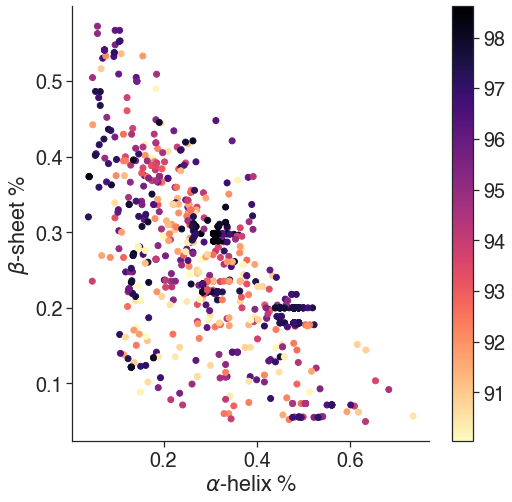

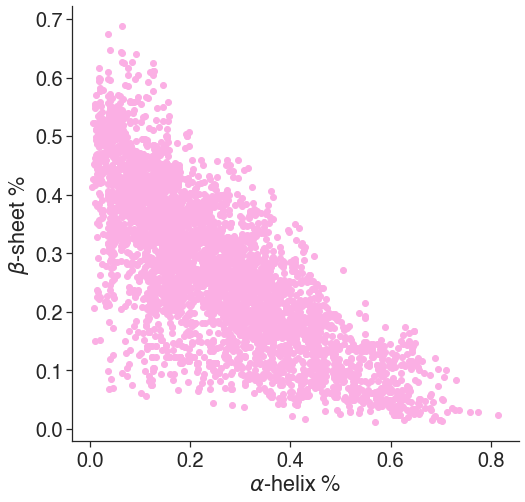

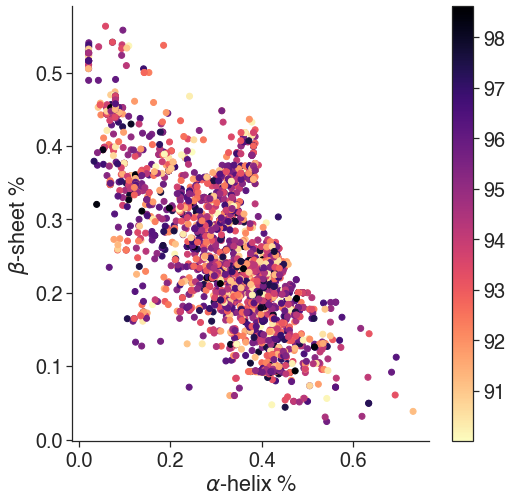

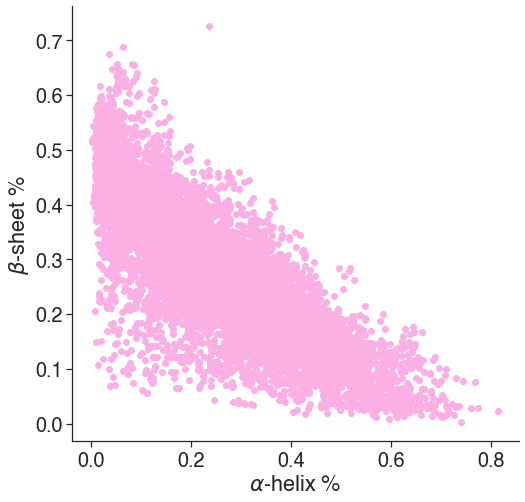

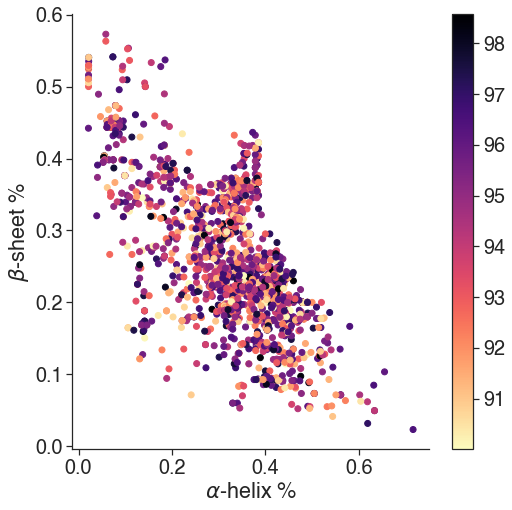

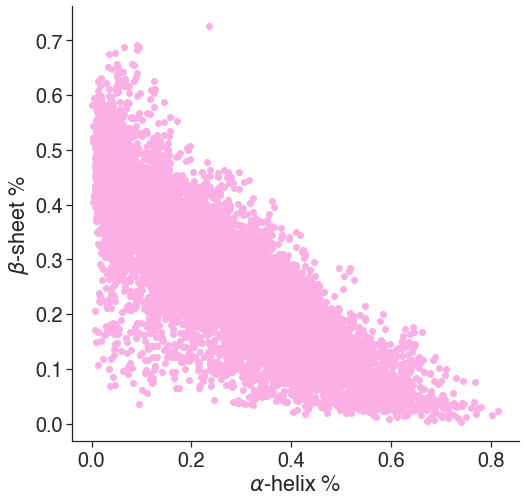

In [6]:
length_ranges = ["100", "200", "300"]
for length in length_ranges:
    alphafold = pd.read_csv(f"data/unique_secondary_structures_{length}.csv")
    plot_percentages(alphafold, use_color_map=True)
    #plt.savefig(f"../plots/alphafold/percentages_{length}.pdf")
    plt.show()
    rcsb = pd.read_csv(f"data/structures_{length}_raw.csv")
    plot_percentages(rcsb, use_color_map=False)
    #plt.savefig(f"../plots/rcsb/percentages_{length}.pdf")
    plt.show()

In [45]:
alphafold = pd.read_csv(f"data/unique_secondary_structures_100.csv")
rsbc = pd.read_csv(f"data/structures_100_raw.csv")
rsbc.fillna(0)

,Unnamed: 0,-,S,E,T,H,G,B,I,0,A
0,0,0.188889,0.100000,0.266667,0.144444,0.300000,0.000000,0.000000,0.000000,0.0,0.0
1,1,0.228856,0.104478,0.398010,0.089552,0.129353,0.049751,0.000000,0.000000,0.0,0.0
2,2,0.200000,0.047619,0.380952,0.109524,0.223810,0.038095,0.000000,0.000000,0.0,0.0
3,3,0.207048,0.066079,0.515419,0.140969,0.061674,0.000000,0.008811,0.000000,0.0,0.0
4,4,0.084906,0.056604,0.000000,0.047170,0.707547,0.056604,0.000000,0.047170,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12201,12201,0.164948,0.061856,0.453608,0.103093,0.185567,0.030928,0.000000,0.000000,0.0,0.0
12202,12202,0.123711,0.103093,0.000000,0.082474,0.639175,0.000000,0.000000,0.051546,0.0,0.0
12203,12203,0.370370,0.046296,0.000000,0.162037,0.402778,0.000000,0.018519,0.000000,0.0,0.0
12204,12204,0.223235,0.084282,0.510251,0.111617,0.000000,0.068337,0.002278,0.000000,0.0,0.0


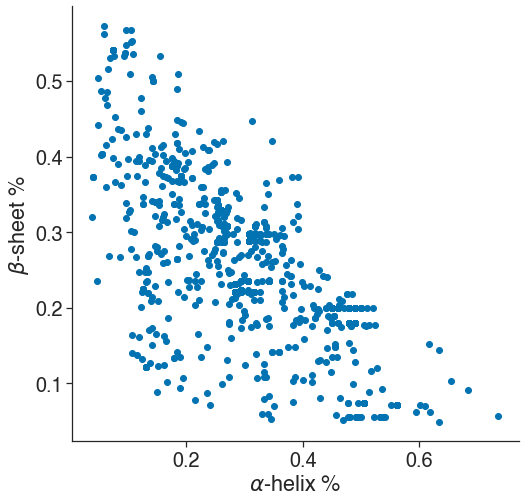

In [10]:
plt.figure(figsize=(8, 8))
sns.set(context="notebook", palette="colorblind", style='ticks', font_scale=1.8, font='Helvetica')
axes = plt.scatter(alphafold["H"], alphafold["beta"])

plt.xlabel(r"$\alpha$-helix %")
plt.ylabel(r"$\beta$-sheet %")
sns.despine()

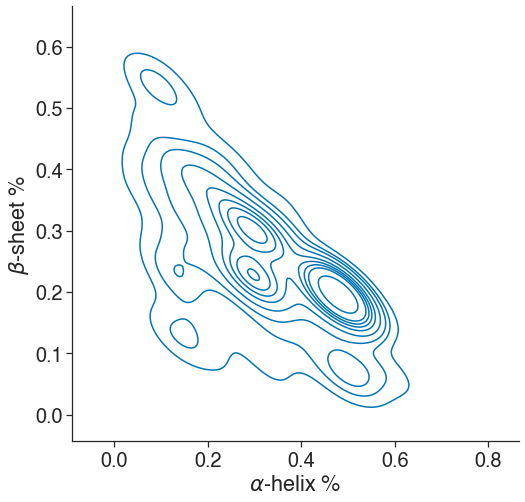

In [13]:
plt.figure(figsize=(8, 8))
sns.kdeplot(data=alphafold, x="H", y="beta")

plt.xlabel(r"$\alpha$-helix %")
plt.ylabel(r"$\beta$-sheet %")
sns.despine()

/Users/toni_brain/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


Text(13.0, 0.5, '$\\beta$-sheet %')

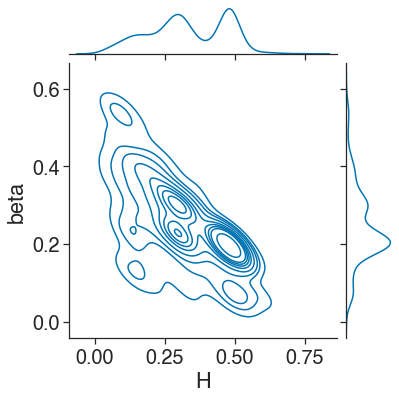

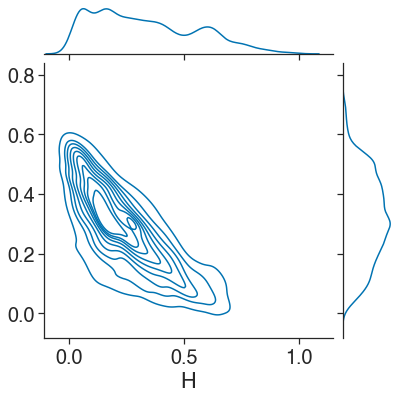

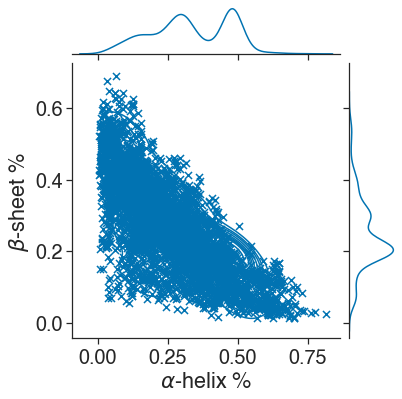

In [24]:
sns.jointplot(x=alphafold["H"], y=alphafold["beta"], kind='kde')
sns.jointplot(x=rsbc["H"], y=rsbc["E"]+rsbc["B"], c="#fbafe4", kind='kde')

plt.xlabel(r"$\alpha$-helix %")
plt.ylabel(r"$\beta$-sheet %")

In [25]:
penguins = sns.load_dataset("penguins")

In [26]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [30]:
df = alphafold[["H","beta"]]

In [32]:
df["Type"] = len(df)*['alpha fold']

<ipython-input-32-e36b16f0376b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']


In [66]:
df

,H,beta,Type
0,0.336364,0.109091,alpha fold
1,0.397959,0.234694,alpha fold
2,0.191304,0.373913,alpha fold
3,0.336538,0.365385,alpha fold
4,0.561224,0.071429,alpha fold
...,...,...,...
1013,0.490741,0.055556,alpha fold
1014,0.480000,0.180000,alpha fold
1015,0.315789,0.221053,alpha fold
1016,0.307692,0.298077,alpha fold


In [58]:
df1 = rsbc["H"]

In [60]:
rsbc = rsbc.fillna(0)
df1["beta"] = rsbc["E"].fillna(0)+rsbc["B"].fillna(0)

<ipython-input-60-dacf17eff884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["beta"] = rsbc["E"].fillna(0)+rsbc["B"].fillna(0)


In [64]:
df1 = pd.DataFrame(rsbc["H"],rsbc["E"].fillna(0)+rsbc["B"].fillna(0))

In [67]:
rsbc["Type"] = len(rsbc)*["PDB"]

In [71]:
df1 = rsbc[["H", "Type"]]

In [73]:
df1['beta'] = rsbc['B']+rsbc['E']

<ipython-input-73-e3f8bf7f43ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B']+rsbc['E']


In [76]:
df1 = df1.loc[:, ["H","beta","Type"]]

In [81]:
whole_df = df.append(df1, ignore_index=True)

In [86]:
whole_df['c'] = 'blue'

/Users/toni_brain/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'fit_kws'
  cset = contour_func(


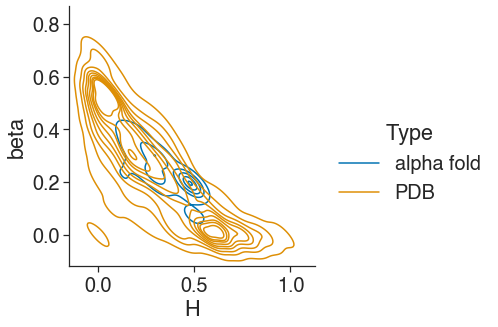

In [88]:
sns.displot(whole_df, x="H", y="beta", hue='Type', kind="kde", fit_kws={"color":"blue"})